<a href="https://colab.research.google.com/github/data-better/DeepS/blob/master/%EC%A0%9C10%EC%9E%A5_%EC%A3%BC%EC%84%B1%EB%B6%84_%EC%9D%B8%EC%9E%90%EB%B6%84%EC%84%9D_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 주성분 분석

In [ ]:
# 모듈 불러오기
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

TensorFlow 2.x selected.


In [ ]:
# 데이터 불러오기
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(train_x.shape[0], 28*28)
test_x  = test_x.reshape(test_x.shape[0], 28*28)

In [ ]:
# 모형설정
pca = PCA(n_components = 10)
pca.fit(train_x) # 학습

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

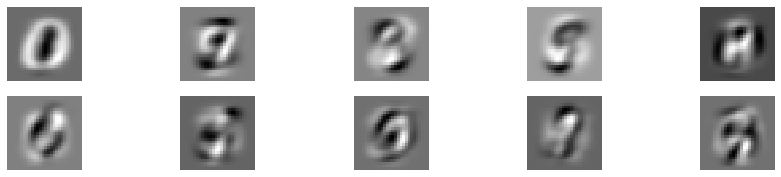

In [ ]:
# 결과 시각화
plt.figure(figsize=(15,3))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.axis('off')
  image_gen = pca.components_[i].reshape(28,28)
  plt.imshow(image_gen, cmap='gray')


## 2. 인자 분석

In [ ]:
# 모듈 불러오기
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import FactorAnalysis as FA
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# 데이터 불러오기
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(train_x.shape[0], 28*28)
test_x  = test_x.reshape(test_x.shape[0], 28*28)

In [ ]:
fa = FA(n_components = 20)
fa.fit(train_x)

loading = np.transpose(fa.components_)
generated = np.transpose(np.dot(loading, np.random.normal(size=(20,10))))
mu = np.mean(train_x,0)

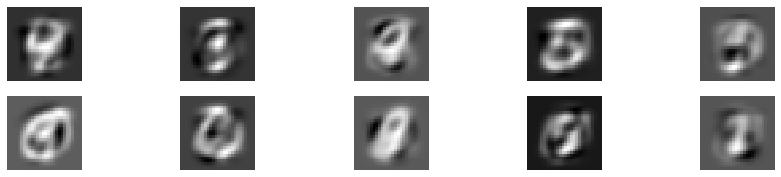

In [ ]:
# 결과 시각화
plt.figure(figsize=(15,3))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.axis('off')
  image_gen = (mu + generated[i]).reshape(28,28)
  plt.imshow(image_gen, cmap='gray')


## 3. 오토인코더

In [ ]:
#모듈 불러오기
#from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, losses, optimizers, models
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 
import time

TensorFlow 2.x selected.


In [ ]:
# 데이터 불러오기
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x/255.0
#train_x = train_x.astype('float32')/255.0
test_x  = test_x/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_data_dim = list(train_x.shape[1:])

In [ ]:
buffer_size_train = train_x.shape[0]
batch_size = 32
batch_size_train = batch_size
train_x = tf.data.Dataset.from_tensor_slices(train_x).shuffle(buffer_size_train).batch(batch_size_train, drop_remainder = True).prefetch(1)

In [ ]:
ae = models.Sequential()
ae.add(Flatten(input_shape = (28,28)))
ae.add(Dense(128, activation='relu', input_shape= [batch_size, 28*28]))
ae.add(Dense(28*28, activation='sigmoid'))

mse = losses.MeanSquaredError()
ae_optimizer = optimizers.Adam(1e-4)

In [ ]:
@tf.function

def trainstep(data_batch):
  x = tf.reshape(data_batch, [batch_size, 28*28])
  with tf.GradientTape() as ae_tape:
    x_tilde = ae(x, training = True)
    ae_loss = mse(x, x_tilde)

  gradients_ae = ae_tape.gradient(ae_loss, ae.trainable_variables)
  ae_optimizer.apply_gradients(zip(gradients_ae, ae.trainable_variables))  

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for data_batch in dataset:
      trainstep(data_batch)

      print("epoch{} training time : {}".format(epoch+1, time.time() - start))

epochs = 50
train(train_x, epochs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
epoch48 training time : 2.0562398433685303
epoch48 training time : 2.0589194297790527
epoch48 training time : 2.0614686012268066
epoch48 training time : 2.064225912094116
epoch48 training time : 2.066478729248047
epoch48 training time : 2.069037675857544
epoch48 training time : 2.0716733932495117
epoch48 training time : 2.074327230453491
epoch48 training time : 2.0769617557525635
epoch48 training time : 2.079540967941284
epoch48 training time : 2.081862688064575
epoch48 training time : 2.084343910217285
epoch48 training time : 2.0867581367492676
epoch48 training time : 2.0892884731292725
epoch48 training time : 2.091916084289551
epoch48 training time : 2.094468832015991
epoch48 training time : 2.0969173908233643
epoch48 training time : 2.0994789600372314
epoch48 training time : 2.1020314693450928
epoch48 training time : 2.1046340465545654
epoch48 training time : 2.1075491905212402
epoch48 training time : 2.11118221282959
epoch48 training time : 2.118

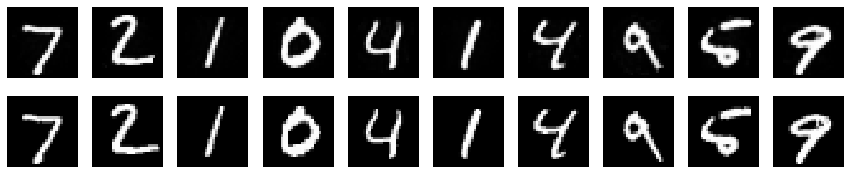

In [ ]:
def generate_image(x):
  x = tf.reshape(x, [1, 28, 28])
  x_tilde = ae(x, training = False) * 255
  return tf.reshape(x_tilde, [28, 28])
  
plt.figure(figsize = (15,3))
for i in range(10):
  x = test_x[i]

  plt.subplot(2, 10, i+1)
  plt.axis('off')
  plt.imshow(generate_image(x), cmap = 'gray') 
  plt.subplot(2,10, i+11) 
  plt.axis('off')
  plt.imshow(x, cmap='gray')

plt.show()  

## 4. GAN : DCGAN

* https://www.tensorflow.org/tutorials/generative/dcgan

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, losses, optimizers, models
from tensorflow.keras.layers import Flatten, Dense, Reshape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 
import time

TensorFlow 2.x selected.


In [ ]:
# 데이터 불러오기
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x/255.0
#train_x = train_x.astype('float32')/255.0
test_x  = test_x/255.0

In [ ]:
batch_size = 32
buffer_size_train = train_x.shape[0]
batch_size_train = batch_size
train_x = tf.data.Dataset.from_tensor_slices(train_x).shuffle(buffer_size_train).batch(batch_size_train, drop_remainder = True).prefetch(1)

### 모델 만들기

* https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3

In [ ]:
## 1. Generater

batch_size = 32
noise_size = 100
generator = models.Sequential()
generator.add(Dense(1200,  activation = 'selu', input_shape = [batch_size, noise_size]))
generator.add(Dense(1200,  activation = 'selu'))
generator.add( Dense(28*28, activation = 'sigmoid') )
generator.add(Reshape([28,28]))

In [ ]:
## 2. Discriminator

discriminator =  models.Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(1200,  activation = 'selu'))
discriminator.add(Dense(1200,  activation = 'selu'))
discriminator.add(Dense(1, activation = 'sigmoid') )

### 학습

In [ ]:
## loss ftn

cross_entropy = losses.BinaryCrossentropy(from_logits=True)

def disc_lossftn(D_x, D_G_z):
  x_loss = cross_entropy(tf.ones_like(D_x), D_x)
  z_loss = cross_entropy(tf.zeros_like(D_G_z), D_G_z)
  return(x_loss + z_loss)

def gen_lossftn(D_G_z):
  return cross_entropy(tf.ones_like(D_G_z), D_G_z) 


In [ ]:
disc_optimizer = optimizers.Adam(1e-4)
gen_optimizer  = optimizers.Adam(1e-4)

In [ ]:
@tf.function

def trainstep(data_batch):
  z_d = tf.random.normal(mean=0, stddev=1, shape = [batch_size, noise_size])
  x   = data_batch

  with tf.GradientTape() as disc_tape:
    D_x   = discriminator(x, training = True)
    G_z_d = generator(z_d, training = False)
    D_G_z_d = discriminator(G_z_d, training = True)
    disc_loss = disc_lossftn(D_x, D_G_z_d)

  gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  disc_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))

  z_g = tf.random.normal(mean=0, stddev=1, shape = [batch_size, noise_size])  

  with tf.GradientTape() as gen_tape:
    G_z_g = generator(z_g, training = False)
    D_G_z_g = discriminator(G_z_g, training = True)
    gen_loss = gen_lossftn(D_G_z_g)

  gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gen_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))

In [ ]:
## 3. 학습
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for data_batch in dataset:
      trainstep(data_batch)

    print("epoch{} training time : {}".format(epoch+1, time.time() - start))

epochs = 50
train(train_x, epochs)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch1 training time : 7.38449239730835
epoch2 training time : 4.9518468379974365
epoch3 training time : 4.907920837402344
epoch4 training time : 4.806240081787109
epoch5 training time : 4.709545612335205
epoch6 training time : 4.7467265129089355
epoch7 training time : 4.760395765304565
epoch8 training time : 4.763521671295166
epoch9 training time : 4.7030417919158936
epoch10 training time : 4.680870056152344
epoch11 training time : 4.728013753890991
epoch12 training time : 4.712180137634277
epoch13 tra

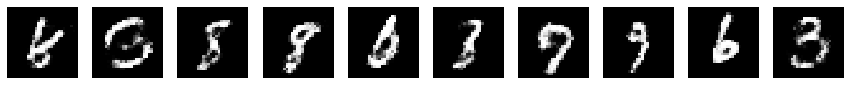

In [ ]:
def generate_image(z_test):
  generated = generator(z_test, training = False)
  return generated * 255
  
plt.figure(figsize = (15,3))

for i in range(10):
  plt.subplot(1,10, i+1)
  plt.axis('off')

  z_test = tf.random.normal(mean=0, stddev = 1, shape = [1, noise_size])
  image_gen = tf.squeeze(generate_image(z_test), axis=0)
  
  plt.imshow(image_gen, cmap = 'gray') 